In [1]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import ipywidgets as widgets

### Environnement

In [2]:
env = gym.make('MountainCar-v0')
seed = 12
train_session = None

### Agents

In [3]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

num_action = env.action_space.n

agent_to_train = None
timesteps_per_episode_per_agent_array = {}

#### Sarsa

In [4]:
agent_init = {
    'seed': seed,
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'num_action': num_action,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'trace_decay': 0.9,
    'eligibility_method': 'replace',
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}

In [5]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [6]:
sarsa_agent = myagents.SarsaAgent(agent_init)
q_learning_agent = myagents.QLearningAgent(agent_init)
sarsa_lambda_agent = myagents.SarsaLambdaAgent(agent_init)
expected_sarsa_agent = myagents.ExpectedSarsaAgent(agent_init)

### RUN

In [7]:
agents = {
    'sarsa': sarsa_agent,
    'q_learning': q_learning_agent,
    'expected_sarsa': expected_sarsa_agent,
    'sarsa_lambda': sarsa_lambda_agent
}

In [8]:
n_episode = 2000
t_max_per_episode = 500
graphical = False

In [9]:
train_session.append_agents(agents)

['sarsa', 'q_learning', 'expected_sarsa', 'sarsa_lambda']

In [10]:
train_session.train(n_episode=n_episode, graphical=graphical)

100%|██████████| 2000/2000 [00:38<00:00, 52.42it/s]


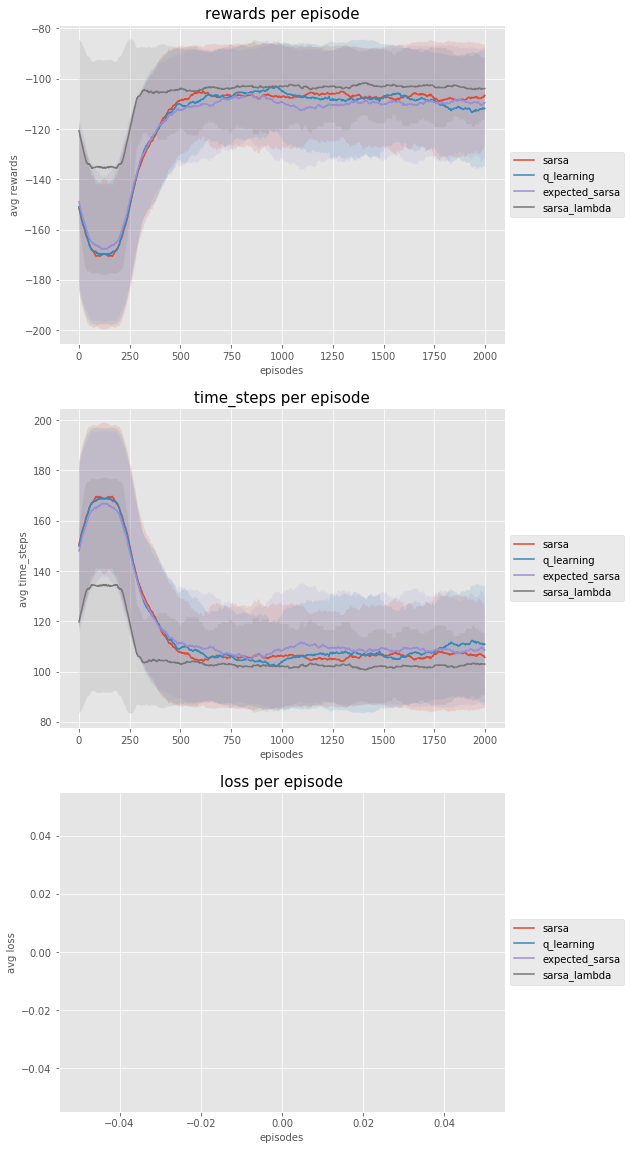

In [11]:
train_session.plot_results(window=250)